**An Introduction to Pandas for Cheminformatics**

In [1]:
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns

Import data from a CSV file

In [2]:
df = pd.read_csv("curated-solubility-dataset.csv")

Read the first few lines of the dataframe

In [3]:
df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


Examine the datatypes for the dataframe

In [4]:
df.dtypes

ID                      object
Name                    object
InChI                   object
InChIKey                object
SMILES                  object
Solubility             float64
SD                     float64
Ocurrences               int64
Group                   object
MolWt                  float64
MolLogP                float64
MolMR                  float64
HeavyAtomCount         float64
NumHAcceptors          float64
NumHDonors             float64
NumHeteroatoms         float64
NumRotatableBonds      float64
NumValenceElectrons    float64
NumAromaticRings       float64
NumSaturatedRings      float64
NumAliphaticRings      float64
RingCount              float64
TPSA                   float64
LabuteASA              float64
BalabanJ               float64
BertzCT                float64
dtype: object

The Pandas **describe** function provides summary statistics for numeric dataframe columns

In [5]:
df.describe()

,Solubility,SD,Ocurrences,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,-2.889909,0.067449,1.378081,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,467.336782
std,2.368154,0.234702,1.023476,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,546.631696
min,-13.171900,0.000000,1.000000,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000
25%,-4.326325,0.000000,1.000000,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,163.243343
50%,-2.618173,0.000000,1.000000,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,351.640433
75%,-1.209735,0.000000,1.000000,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.562848
max,2.137682,3.870145,38.000000,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708


The **columns** attribute of dataframe provides the column names

In [6]:
df.columns

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

The **sort_values** function sorts a dataframe.  Note that this returns another dataframe.  To sort the dataframe in place set **inplace=True**

In [7]:
df.sort_values("Group",ascending=False)

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
9981,I-94,warfarin,InChI=1S/C19H16O4/c1-12(20)11-15(13-7-3-2-4-8-...,PJVWKTKQMONHTI-UHFFFAOYSA-N,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,-4.7800,0.450506,3,G5,308.333,...,4.0,116.0,3.0,0.0,0.0,3.0,67.51,132.552025,2.258072,909.550973
8710,E-140,trichloroethylene,InChI=1S/C2HCl3/c3-1-2(4)5/h1H,XSTXAVWGXDQKEL-UHFFFAOYSA-N,ClC=C(Cl)Cl,-1.9600,0.063496,3,G5,131.389,...,0.0,30.0,0.0,0.0,0.0,0.0,0.00,45.324389,3.143197,42.854753
8765,E-530,ephedrine,InChI=1S/C10H15NO/c1-8(11-2)10(12)9-6-4-3-5-7-...,KWGRBVOPPLSCSI-UHFFFAOYSA-N,OC(c(cccc1)c1)C(NC)C,-0.4200,0.049216,3,G5,165.236,...,3.0,66.0,1.0,0.0,0.0,1.0,32.26,73.235268,2.711041,222.540006
8764,E-521,phenallymal,InChI=1S/C13H12N2O3/c1-2-8-13(9-6-4-3-5-7-9)10...,WOIGZSBYKGQJGL-UHFFFAOYSA-N,c1ccccc1C2(CC=C)C(=O)NC(=O)NC2=O,-2.1800,0.096968,4,G5,244.250,...,3.0,92.0,1.0,1.0,1.0,2.0,75.27,103.874854,2.560321,502.297711
8763,E-496,strychnine,InChI=1S/C21H22N2O2/c24-18-10-16-19-13-9-17-21...,QMGVPVSNSZLJIA-UHFFFAOYSA-N,O=C(N(c(c(C1(C(N(C2)CC(C3C4C5OC6)=C6)C3)C2)ccc...,-3.3200,0.440782,3,G5,334.419,...,0.0,128.0,1.0,4.0,6.0,7.0,32.78,146.975680,1.552423,848.052734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,B-570,2-methylpyrazine,"InChI=1S/C5H6N2/c1-5-4-6-2-3-7-5/h2-4H,1H3",CAWHJQAVHZEVTJ-UHFFFAOYSA-N,Cc1cnccn1,1.0263,0.000000,1,G1,94.117,...,0.0,36.0,1.0,0.0,0.0,1.0,25.78,42.235641,3.021465,136.007504
4007,B-567,n-methylmorpholine,"InChI=1S/C5H11NO/c1-6-2-4-7-5-3-6/h2-5H2,1H3",SJRJJKPEHAURKC-UHFFFAOYSA-N,CN1CCOCC1,0.9950,0.000000,1,G1,101.149,...,0.0,42.0,0.0,1.0,1.0,1.0,12.47,44.066567,2.122918,50.041844
4006,B-566,3-methylpyridine,"InChI=1S/C6H7N/c1-6-3-2-4-7-5-6/h2-5H,1H3",ITQTTZVARXURQS-UHFFFAOYSA-N,Cc1cccnc1,1.0309,0.000000,1,G1,93.129,...,0.0,36.0,1.0,0.0,0.0,1.0,12.89,43.015993,3.021465,134.107370
4005,B-565,thiophenol,"InChI=1S/C6H6S/c7-6-4-2-1-3-5-6/h1-5,7H",RMVRSNDYEFQCLF-UHFFFAOYSA-N,Sc1ccccc1,-2.1204,0.000000,1,G1,110.181,...,0.0,36.0,1.0,0.0,0.0,1.0,0.00,48.586470,3.021465,134.107370


In [20]:
mf_df = pd.read_csv("mol_formula.csv")
mf_df

,SMILES,MF
0,[O--].[O--].[O--].[O--].[O--].[Al+3].[Al+3].[C...,Al2Ca2O5
1,[O--].[O--].[O--].[O--].[O--].[O--].[Al+3].[Al...,Al2Ca6O18S3
2,[O--].[O--].[O--].[O--].[O--].[Al+3].[Al+3].[C...,Al2Co2O5
3,[O--].[O--].[O--].[O--].[O--].[O--].[O--].[O--...,Al2Mo2O9-12
4,[O--].[O--].[O--].[O--].[O--].[Al+3].[Al+3].[Z...,Al2O5Zn2
...,...,...
9977,[Ta],Ta
9978,[Te],Te
9979,[V],V
9980,[Y],Y


I like to be able have progress bar for operations that take more than a couple of seconds.  The tqdm library provides a simple way of adding a progress bar to a python program. 

In [8]:
tqdm.pandas()

In [9]:
df['Mol'] = df.SMILES.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/9982 [00:00<?, ?it/s]

RDKit WARNING: [20:00:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:00:20] WARNING: not r

In [10]:
query = Chem.MolFromSmarts("c1ccccn1")

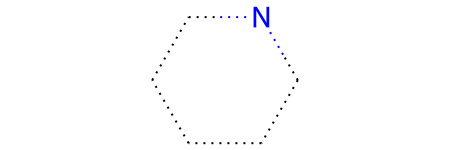

In [11]:
query

In [12]:
df['pyridine'] = [x.HasSubstructMatch(query) for x in tqdm(df.Mol)]

  0%|          | 0/9982 [00:00<?, ?it/s]

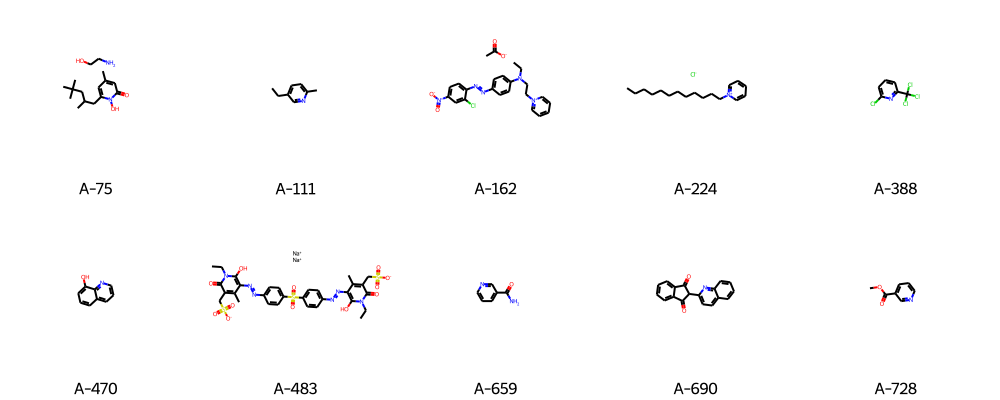

In [13]:
hits = df.query("pyridine").head(10)
MolsToGridImage(hits.Mol,legends=hits.ID.to_list(),molsPerRow=5)

In [14]:
match_list = [x.GetSubstructMatch(query) for x in hits.Mol]

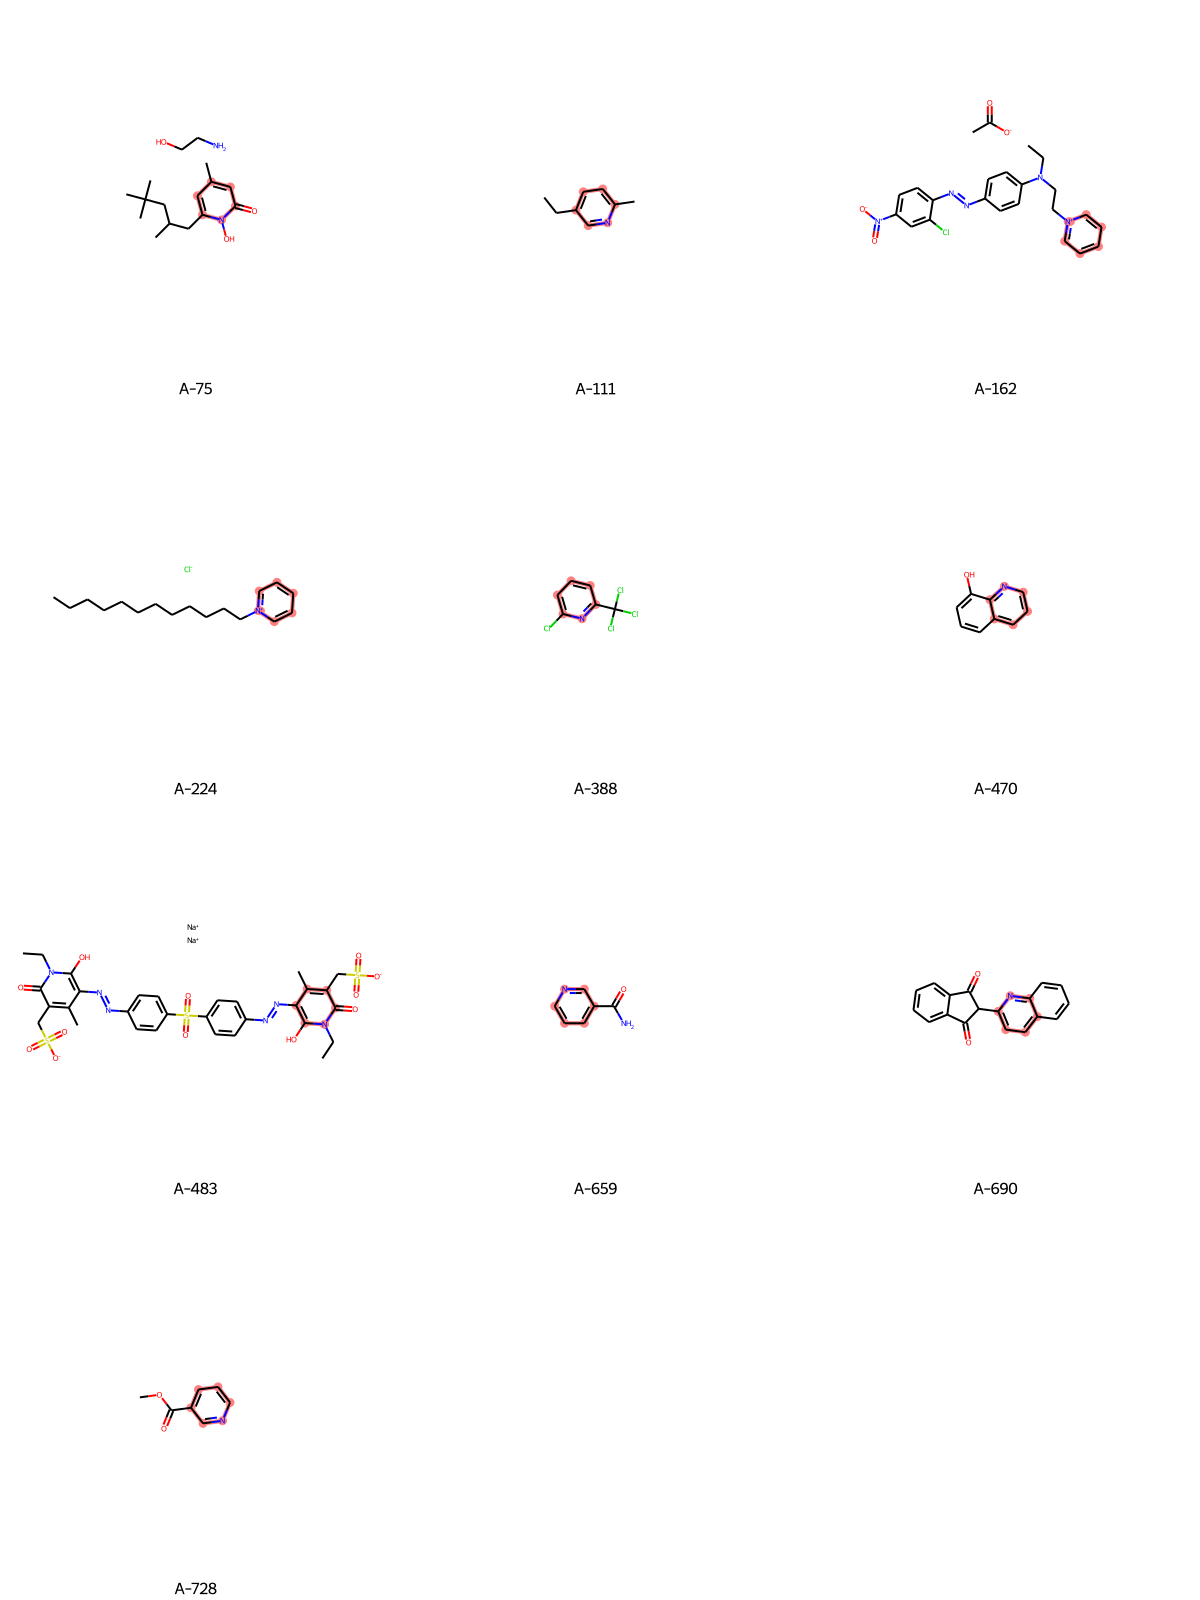

In [15]:
MolsToGridImage(hits.Mol,legends=hits.ID.to_list(),molsPerRow=3,highlightAtomLists=match_list,subImgSize=(400, 400))

In [16]:
res = []
for k,v in df.groupby("Group"):
    res.append([k,len(v),v.Solubility.mean()])
res_df = pd.DataFrame(res,columns=["Group","Size","Mean"]).round(decimals=2)
res_df

,Group,Size,Mean
0,G1,7746,-2.86
1,G2,235,-4.05
2,G3,1182,-2.79
3,G4,183,-3.81
4,G5,636,-2.68


<AxesSubplot:title={'center':'Solubility'}, xlabel='Group'>

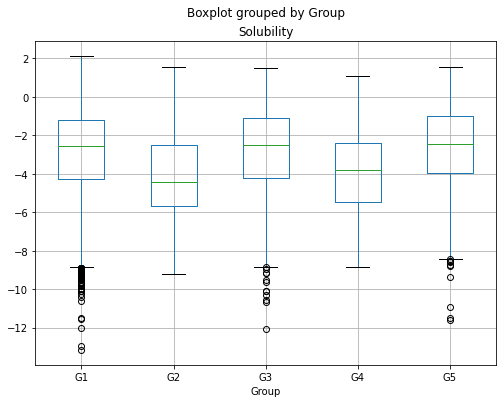

In [17]:
df.boxplot(column="Solubility",by="Group",figsize=(8,6))

<AxesSubplot:xlabel='Group', ylabel='Solubility'>

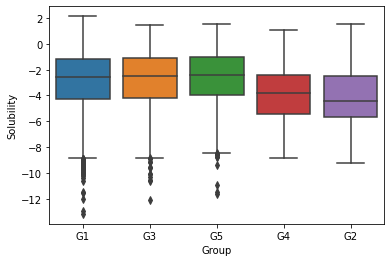

In [18]:
sns.boxplot(x="Group",y="Solubility",data=df)